In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

mpl.rc('image', cmap='grey')

In [2]:
# Creating image
def CreateImage(size):
    width = height = size
    image = np.zeros((width, height))

    return image

# Set Values
def SetDiffractionGrating(size, slitWidth, value=1):
    
    image = CreateImage(size)

    i = 0
    even = False
    while i < len(image):

        if even == True:
            image[:,i:i+slitWidth] = value
            even = False
            
        elif even == False:
            even = True

        i += slitWidth

    return image

def SetSineGrating(size, slitWidth, amplitude=1):

    image = CreateImage(size)

    i = 0
    while i < len(image):
        image[:,i] = np.sin(i/slitWidth)

        i += 1

    return image

def RectangularAperture(size, rect, amplitude):

    image = CreateImage(size)

    startX, endX, startY, endY = rect

    y = startY
    while y < endY:

        x = startX
        while x < endX:

            image[y][x] = amplitude

            x += 1
        y += 1

    return image

def CircularAperture(gridSize, centre, radius, amplitude=1):

    image = CreateImage(gridSize)

    centreX, centreY = centre

    y = 0
    while y < len(image):

        x = 0
        while x < len(image[:,0]):

            if (x - centreX)**2 + (y - centreY)**2 < radius**2:
                image[y][x] = amplitude

            x += 1
        y += 1

    return image

In [22]:
def PlotFFT(image, returnFFT=False):
    

    fft = np.fft.ifftshift(image)
    fft = np.fft.fft2(fft)
    fft = np.fft.fftshift(fft) # Shift the zero-frequency component to the center of the spectrum.
                               # https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html#numpy.fft.fftshift

    fftImage = abs(fft) # as fft result is complex

    plt.imshow(fftImage)

    if returnFFT:
        return fft
    else:
        return

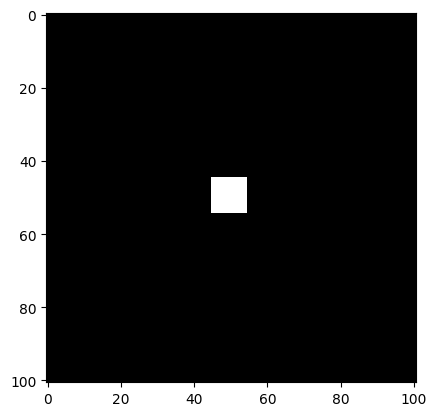

In [12]:
rectangularAperture = RectangularAperture(101, [45, 55, 45, 55], 1)

plt.imshow(rectangularAperture)

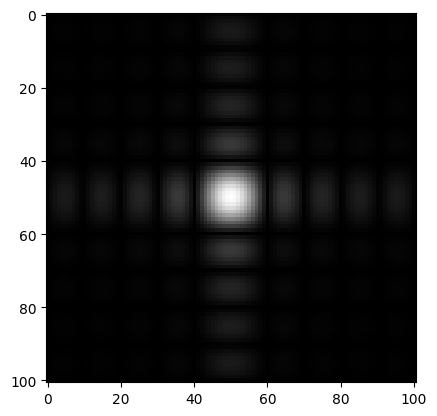

In [21]:
PlotFFT(rectangularAperture)

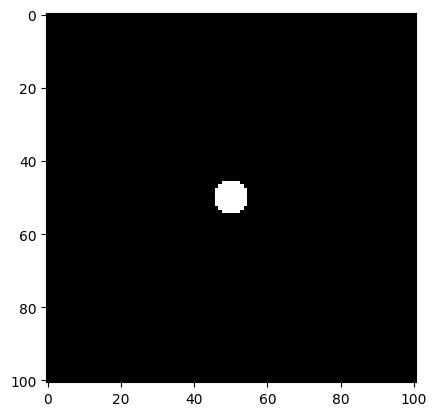

In [23]:
circularAperture = CircularAperture(101, (50, 50), 5)

plt.imshow(circularAperture)

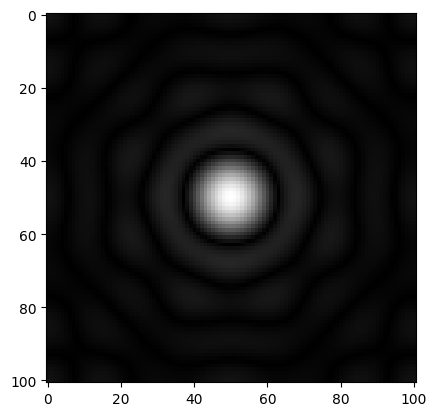

In [24]:
PlotFFT(circularAperture)